In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
!pwd


/content


In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [5]:

from datetime import datetime
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///gdrive/MyDrive/sqlalchemy-challenge/Starter_Resources /hawaii.sqlite", echo = False)
# /Users/petergunn/sqlalchemy-challenge/Starter Resources /hawaii.sqlite

In [8]:
# reflect an existing database into a new modely
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
print(one_year)


# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date,Measurement.prcp]
results = session.query(*sel).filter(Measurement.date >= one_year).all()
for result in results:
    print(result)

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_scores = pd.DataFrame(results, columns = ['date', 'prcp'])
prcp_scores = prcp_scores.set_index('date')

# Sort the dataframe by date
prcp_scores = prcp_scores.sort_values(['date']).dropna()


# Use Pandas Plotting with Matplotlib to plot the data
prcp_scores=prcp_scores.rename(columns={'prcp':'precipitation'})
prcp_scores.head()



2016-08-23
('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-1

,precipitation
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

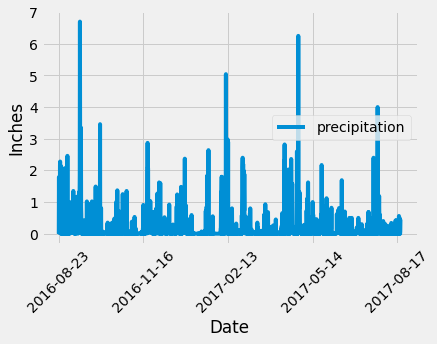

In [14]:
prcp_scores.plot()
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation = 45)

# Exploratory Station Analysis

In [15]:
total_stations = session.query(Station).group_by(Station.station).count()
print(f'There are a total of {total_stations} stations in this datatset')

There are a total of 9 stations in this datatset


In [16]:

active_stations = session.query(Measurement.station, func.count(Measurement.date)).\
                                group_by(Measurement.station).order_by(func.\
                                count(Measurement.date).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
most_active_station_id = 'USC00519281'
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)]
most_active_tobs = session.query(*sel).filter(Measurement.station == most_active_station_id).all()
print(f'The lowest, highest and average temperatures for {most_active_station_id} station are: {most_active_tobs}')

The lowest, highest and average temperatures for USC00519281 station are: [(54.0, 85.0, 71.66378066378067)]


In [27]:
sel=[Measurement.station, Measurement.date, Measurement.tobs]
year_temp_obs=session.query(*sel).filter(Measurement.date >= one_year).\
                filter(Measurement.station == most_active_station_id).all()
year_temp_obs



[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

In [28]:
year_temp_obs = pd.DataFrame(year_temp_obs)
year_temp_obs = year_temp_obs.rename(columns = {0:'Station_ID', 1 :'Date', 2 :'Temperature'})
year_temp_obs.head()

,Station_ID,Date,Temperature
0,USC00519281,2016-08-23,77.0
1,USC00519281,2016-08-24,77.0
2,USC00519281,2016-08-25,80.0
3,USC00519281,2016-08-26,80.0
4,USC00519281,2016-08-27,75.0


<function matplotlib.pyplot.show(*args, **kw)>

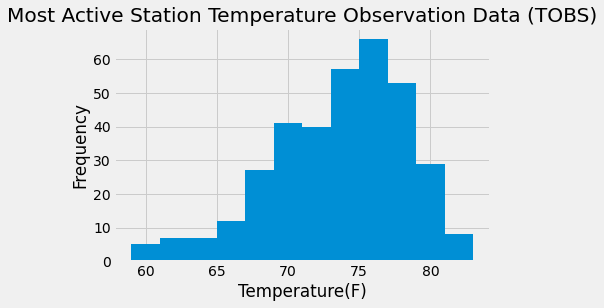

In [30]:
# Using the most active station id Query plot the results as a histogram

year_temp_obs.hist(column='Temperature', bins=12)
plt.title('Most Active Station Temperature Observation Data (TOBS)')
plt.xlabel('Temperature(F)')
plt.ylabel('Frequency')

plt.show

# Close session

In [ ]:
# Close Session
session.close()